# Assignment 2

### CS2545 - Data Science ###
### Fall, 2021 ###
### UNB, Fredericton ###

**Notebook:** Complete the assignment and submit the .ipynb file (with filename changed to **Assignment02_LastName_FirstName.ipynb**) to D2L. <br>
<br>
**Deadline:** 5:00 pm, December 9, 2021
<br>
<br>
**Submission guidelines:** <br>
•	Late assignments will not be marked, except if alternate arrangements have been approved by the instructor. <br>
•	Assignment components that are required to be submitted electronically via D2L, and are not submitted via D2L, will not be marked. <br>

**Note about plagiarism:** <br>
Any assignments that appear to be in violation of an academic offence (plagiarism) will be reported to the Registrar’s Office as per UNB regulations (See section VII of UNB Undergraduate Calendar). <br>


**Task and Dataset** 

For this assignment you will analyze Spotify datasets and perform music related analysis. You will find the following 3 files  in the datasets.zip file from D2L:

- *artists.csv*
- *albums.csv*
- *tracks.csv*

You may want to first open the files with a text editor and observe the files carefully, to get an idea about the fields in the data table. The meaning of each column label is self-explanatory.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import thinkstats2
import thinkplot
%matplotlib inline


**Q1** Load the 3 data files (mentioned above) as dataframes: *artists_df*, *albums_df* and *track_df* respectively. 

Then, show the first 5 records of the dataframes.

In [4]:
# load artists_df  dataframe

artists_df = pd.read_csv("artists.csv", delimiter =',')

,artist_id,artist_popularity,followers,genres,artist_name
0,4mGnpjhqgx4RUdsIJiURdo,44,23230,"['sertanejo', 'sertanejo pop', 'sertanejo trad...",Juliano Cezar
1,1dLnVku4VQUOLswwDFvRc9,22,313,[],The Grenadines
2,6YVY310fjfUzKi8hiqR7iK,26,1596,['danish pop rock'],Gangway
3,2VElyouiCfoYPDJluzwJwK,31,149,['uk alternative pop'],FADES
4,4agVy03qW8juSysCTUOuDI,21,11,['french baroque'],Jean-Pierre Guignon


In [6]:
# load albums_df  dataframe

albums_df = pd.read_csv('albums.csv', delimiter =',')

,album_id,album_type,artist_id,album_name,release_date,release_date_precision,total_tracks
0,1gAM7M4rBwEbSPeAQR2nx1,single,3DiDSECUqqY1AuBP8qtaIa,If I Ain't Got You EP,2/8/2019,day,6
1,4KfJZV7WfolYlxBzOTo66s,album,6s1pCNXcbdtQJlsnM1hRIA,Shostakovich Symphony No.5 - Four Romances on ...,3/1/2019,day,8
2,7nLYY7uAVUb57kpd7tZxnS,single,5YjfNaHq05WrwldRe1QSBc,Take My Bass,3/14/2019,day,1
3,6p20Rt4x2Qn5mUMRi1s6pj,single,2G9Vc16JCpnZmK4uGH46Fa,Hypnotizing (Are U),11/16/2016,day,1
4,1XeoOqC1q7U2iyLEQJ64cu,single,2dwM9OcE4c3Ph1UBINSodx,Sunshine,7/20/2018,day,1


In [7]:
# load tracks_df  dataframe

tracks_df = pd.read_csv('tracks.csv', delimiter = ',')

,track_id,album_id,artists_id,popularity,acousticness,danceability,duration_ms,energy,liveness,loudness,speechiness,tempo,valence,track_name_prev,track_number
0,5qljLQuKnNJf4F4vfxQB0V,0D3QufeCudpQANOR7luqdr,['3mxJuHRn2ZWD5OofvJtDZY'],28,0.294,0.698,235584,0.606,0.151,-7.447,0.0262,115.018,0.6220,track_14,1
1,3VAX2MJdmdqARLSU5hPMpm,1bcqsH5UyTBzmh9YizdsBE,['4xWMewm6CYMstu0sPgd9jJ'],31,0.863,0.719,656960,0.308,0.253,-10.340,0.9220,115.075,0.5890,track_3,3
2,1L3YAhsEMrGVvCgDXj2TYn,4tKijjmxGClg4JOLAyo2qE,['3hYaK5FF3YAglCj5HZgBnP'],31,0.750,0.466,492840,0.931,0.938,-13.605,0.9440,79.565,0.0850,track_4,4
3,6aCe9zzoZmCojX7bbgKKtf,6FeJF5r8roonnKraJxr4oB,['2KQsUB9DRBcJk17JWX1eXD'],14,0.763,0.719,316578,0.126,0.113,-20.254,0.9380,112.822,0.5330,track_9,1
4,1Vo802A38tPFHmje1h91um,4tKijjmxGClg4JOLAyo2qE,['3hYaK5FF3YAglCj5HZgBnP'],32,0.770,0.460,558880,0.942,0.917,-13.749,0.9430,81.260,0.0906,track_2,2


**Q1.1** Merge the *artists_df* and *albums_df*  dataframes and name the new dataframe *art_alb_df* and show the first 5 rows.

In [8]:
# your code 
art_alb_df = pd.merge(artists_df, albums_df, on = 'artist_id')
art_alb_df.head()

,artist_id,artist_popularity,followers,genres,artist_name,album_id,album_type,album_name,release_date,release_date_precision,total_tracks
0,4mGnpjhqgx4RUdsIJiURdo,44,23230,"['sertanejo', 'sertanejo pop', 'sertanejo trad...",Juliano Cezar,2tx2zEr2JUKhDqnRlWQdzR,album,É Isso Que A Galera Quer,9/1/2006,day,15
1,4mGnpjhqgx4RUdsIJiURdo,44,23230,"['sertanejo', 'sertanejo pop', 'sertanejo trad...",Juliano Cezar,2zmd7Bn7in6CrgdHpFvU0b,album,Sucessos de Juliano Cézar,8/1/2013,day,15
2,1dLnVku4VQUOLswwDFvRc9,22,313,[],The Grenadines,5YEORJnaovJcPqKNhlIQlx,album,Band on the Radio,11/16/2018,day,10
3,6YVY310fjfUzKi8hiqR7iK,26,1596,['danish pop rock'],Gangway,65CsTqUbM5RH0jFRZdIygK,album,Happy Ever After,9/17/1992,day,12
4,2VElyouiCfoYPDJluzwJwK,31,149,['uk alternative pop'],FADES,7Jbgxp7IqL09ODxOPYJJkv,single,Wasted,2/22/2019,day,1


**Q1.2** Show the name of the artists and number of albums for the top 20 artists with the most number of albums (**not singles**). 

In [11]:
# your code 
adf = art_alb_df[['artist_name', 'album_type']]
adf.sort_values('album_type')
adf = adf[adf.album_type == 'album']
adf['count'] = adf.groupby('artist_name')['artist_name'].transform('count')
adf.drop_duplicates(subset = 'artist_name', keep = 'first', inplace = True)
adf.sort_values(by='count', ascending = False).head(20)

,artist_name,album_type,count
69228,Johann Sebastian Bach,album,81
55141,Wolfgang Amadeus Mozart,album,56
61691,Various Artists,album,53
48042,Frédéric Chopin,album,48
54301,Ludwig van Beethoven,album,37
33948,Johnny Cash,album,34
60923,Jean Sibelius,album,33
67172,A.R. Rahman,album,31
66252,Franz Schubert,album,30
69162,Franz Joseph Haydn,album,29


**Q1.3** How many singles and how many albums were released by Alicia Keys since 2010 (inclusive). 

Note that the release date of albums can be a year or a particular date.

In [19]:
# your code 
akdf = art_alb_df[['artist_name', 'release_date', 'album_type']]
akdf = akdf[akdf['artist_name'] == 'Alicia Keys']
akdf = akdf[akdf.album_type != 'compilation'] 
akdf['release_date'] = pd.to_datetime(akdf['release_date'])
akdf = akdf.sort_values(by=['release_date'], ascending = False)
akdf_output = akdf.loc[(akdf['release_date'] > '2009-12-31')]
print('Since 2010 inclusive, Alicia Keys released')
akdf_output['album_type'].value_counts()


Since 2010 inclusive, Alicia Keys released


single    7
album     2
Name: album_type, dtype: int64

In [16]:
# intentionally left blank

**Q2.1** Who are the top 5 artists with the most popularity? Do these artists have the most followers? If the lists of artists differ, what does that mean? 

Use *artists_df* to answer this question.

In [20]:
# your code for  top 5 artists with the most popularity
largest = 5
populArtistsdf = artists_df.nlargest(largest, 'artist_popularity')
populArtistsdf

,artist_id,artist_popularity,followers,genres,artist_name
42872,66CXWjxzNUsdJxJ2JdwvnR,100,26309771,"['dance pop', 'pop', 'post-teen pop']",Ariana Grande
53392,3TVXtAsR1Inumwj472S9r4,98,34680740,"['canadian hip hop', 'canadian pop', 'hip hop'...",Drake
49775,246dkjvS1zLTtiykXe5h60,96,12150628,"['pop', 'rap']",Post Malone
49695,4MCBfE4596Uoi2O4DtmEMz,95,3607186,['chicago rap'],Juice WRLD
52306,1i8SpTcr7yvPOmcqrbnVXY,95,15389549,"['reggaeton', 'trap latino']",Ozuna


In [21]:
# your code for artists having the most followers

largest = 5
populArtistsfolldf = artists_df.nlargest(largest, 'followers')
populArtistsfolldf


,artist_id,artist_popularity,followers,genres,artist_name
55251,6eUKZXaKkcviH0Ku9w2n3V,92,41561693,"['pop', 'uk pop']",Ed Sheeran
53392,3TVXtAsR1Inumwj472S9r4,98,34680740,"['canadian hip hop', 'canadian pop', 'hip hop'...",Drake
52620,5pKCCKE2ajJHZ9KAiaK11H,90,30560149,"['dance pop', 'pop', 'post-teen pop', 'r&b', '...",Rihanna
54447,1uNFoZAHBGtllmzznpCI3s,88,26824224,"['canadian pop', 'dance pop', 'pop', 'post-tee...",Justin Bieber
42872,66CXWjxzNUsdJxJ2JdwvnR,100,26309771,"['dance pop', 'pop', 'post-teen pop']",Ariana Grande


**Answer:**  just because an artist has the highest popularity does not mean that artist will have the most followers and vice versa

**Q2.2** Using *artists_df* create a list called *genres* containing all possible values within the "genre" column. This list must contain only unique values.

*Hint*: the genres column contains strings, not lists.

In [ ]:
#your code



**Q2.3** Using *artists_df* create 5 new dataframes *pop_df*, *rock_df*, *jazz_df*, *indie_df* and *hiphop_df*. If the genre of a track **contains** the word "pop" (such as, in "danish pop rock"), add it to the *pop_df*. Do this (i.e. create the corresponding dataframes) in a  similar way for other genres.


In [34]:
# your code
# CONTAIN MTNSA4
pop_df = artists_df[artists_df['genres'].str.contains('pop')]
# pop_df
rock_df = artists_df[artists_df['genres'].str.contains('rock')]
# rock_df
jazz_df = artists_df[artists_df['genres'].str.contains('jazz')]
# jazz_df
indie_df = artists_df[artists_df['genres'].str.contains('indie')]
# indie_df
hiphop_df = artists_df[artists_df['genres'].str.contains('hip hop')]
# hiphop_df

**Q2.4** For each of the 5 categories from Q2.3, plot the boxplots of the artist popularity in a single plot. Which genre has the highest median artist popularity and which boxplot looks like it has the lowest number of outliers? How do you know?

<AxesSubplot:>

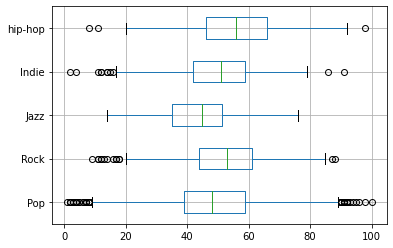

In [40]:
# your code

popularity_df = pd.DataFrame()

popularity_df['Pop'] = pop_df['artist_popularity']

popularity_df['Rock'] = rock_df['artist_popularity']

popularity_df['Jazz'] = jazz_df['artist_popularity']

popularity_df['Indie'] = indie_df['artist_popularity']

popularity_df['Hip-hop'] = hiphop_df['artist_popularity']

popularity_df.boxplot(vert = False)

**Answer:** It is clear that hip-hop has the highest median. Jazz also has the lowest number of outliers

**Q2.5** For each of the 5 categories from Q2.3, plot a bar chart of the number of followers per given genre (pop, rock, jazz, indie and hip hop) in a single plot. Which genre has the most followers? Which one has the least?

In [17]:
# your code


**Answer:** 

In [15]:
# intentionally left blank

**Q3.1** Using *artists_df* create a new dataframes *nogenre_df*. If the genre of a track **contains** is an empty list ('[]'), add it to the dataframe. Display the first 5 values of the dataframe.

*Hint*: the genres column contains strings, not lists.

In [53]:
# your code

nogenre_df = artists_df[artists_df['genres'] == ('[]')]
nogenre_df.head()

,artist_id,artist_popularity,followers,genres,artist_name
1,1dLnVku4VQUOLswwDFvRc9,22,313,[],The Grenadines
5,38VBjthd0szbS6wpDMafrb,43,81,[],Filhos
6,36mHwYa65L0WZbAXY2iSGw,34,8358,[],Eloq
7,1jJyy00XfxjB4tMAv5OT0q,7,158,[],Fravær
8,10A8WbBJ0zW8MnvTsUL6os,21,30,[],Camille Pépin


**Q3.2** In a single plot, show 6 Probability Mass Functions (PMF), as step functions, of the artist popularity for the genres from question *Q2.3* and the *nogenre_df* created in *Q3.1*.


*Hint*: Refer to lecture notes on *_Statistics.pdf to see how to plot PMFs. 

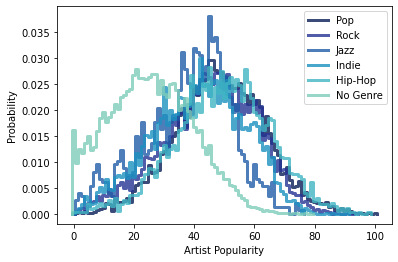

<Figure size 576x432 with 0 Axes>

In [57]:
# your code 
import thinkstats2 as ts
import thinkplot as tp

poppmf = ts.Pmf(pop_df['artist_popularity'], label = 'Pop')
tp.Pmf(poppmf)

rockpmf = ts.Pmf(rock_df['artist_popularity'], label = 'Rock')
tp.Pmf(rockpmf)

jazzpmf = ts.Pmf(jazz_df['artist_popularity'], label = 'Jazz')
tp.Pmf(jazzpmf)

indiepmf = ts.Pmf(indie_df['artist_popularity'], label = 'Indie')
tp.Pmf(indiepmf)

hhpmf = ts.Pmf(hiphop_df['artist_popularity'], label = "Hip-Hop")
tp.Pmf(hhpmf)

NGPMF = ts.Pmf(nogenre_df['artist_popularity'], label = 'No Genre')
tp.Pmf(NGPMF)

tp.config(xlabel = 'Artist Popularity', ylabel = 'Probability')
tp.show()

**Q3.3** From the PMF plots, what can you infer? (Note that artist popularity is on a scale from 0-100)

**Answer:** Colors look similar yet, if I am correct, it looks like jazz has the higest artist popularity probability

**Q3.4** In a single plot, show 6 Cumulative Distribution Functions (CDF) of the artist popularity for the genres from question *Q2.3* and the *nogenre_df* created in *Q3.1*.


*Hint*: Refer to lecture notes on *_Statistics.pdf to see how to plot CDFs. 

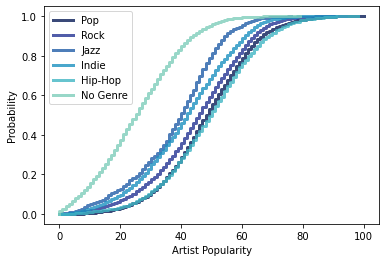

<Figure size 576x432 with 0 Axes>

In [58]:
# your code 
 
import thinkstats2 as ts
import thinkplot as tp

poppmf = ts.Cdf(pop_df['artist_popularity'], label = 'Pop')
tp.Cdf(poppmf)

rockpmf = ts.Cdf(rock_df['artist_popularity'], label = 'Rock')
tp.Cdf(rockpmf)

jazzpmf = ts.Cdf(jazz_df['artist_popularity'], label = 'Jazz')
tp.Cdf(jazzpmf)

indiepmf = ts.Cdf(indie_df['artist_popularity'], label = 'Indie')
tp.Cdf(indiepmf)

hhpmf = ts.Cdf(hiphop_df['artist_popularity'], label = "Hip-Hop")
tp.Cdf(hhpmf)

NGPMF = ts.Cdf(nogenre_df['artist_popularity'], label = 'No Genre')
tp.Cdf(NGPMF)

tp.config(xlabel = 'Artist Popularity', ylabel = 'Probability')
tp.show()

**Q3.5** From the CDF plots, what can you infer? 

**Answer:** The probability of the artists popularity is higher than the rest until around 60 

In [14]:
# intentionally left blank

**Q4.**  Danceability  has been defined as a property that indicates how suitable a piece of music is to dance based on various audio features such as tempo, loudness, valence (i.e. musical positiveness of emotion) and speechiness etc. In the next few questions, you will try to determine the features that have the most influence on danceability.

Use *tracks_df* to answer these questions. Filter out any record with danceability 0 or less, before proceeding.

**Q4.1** Plot a scatterplot of the danceability of the tracks (on the x-axis) and their tempo (on the y-axis), then calculate Pearson’s Correlation Coefficient. 

No handles with labels found to put in legend.


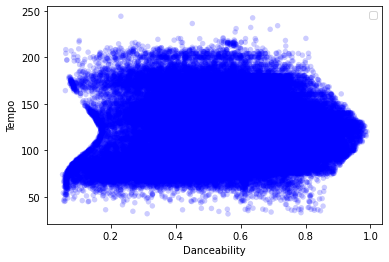

PCC =   -0.03480840591508537


<Figure size 576x432 with 0 Axes>

In [60]:
# your code
dandf = tracks_df[tracks_df.danceability != 0].reset_index()
tp.Scatter(dandf['danceability'], dandf['tempo'])
tp.Show(xlabel = 'Danceability', ylabel = 'Tempo')
print("PCC =  ", ts.Corr(dandf['danceability'], dandf['tempo']))

**Q4.2** Plot a scatterplot of the danceability of the tracks (on the x-axis) and their valence (on the y-axis), then calculate Pearson’s Correlation Coefficient. 

No handles with labels found to put in legend.


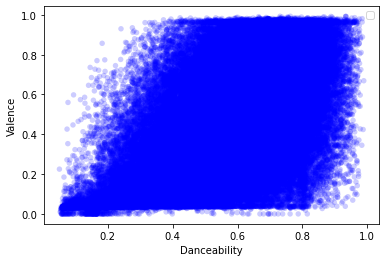

PCC =   0.5163542935179823


<Figure size 576x432 with 0 Axes>

In [62]:
# your code
tp.Scatter(dandf['danceability'], dandf['valence'])
tp.Show(xlabel = 'Danceability', ylabel = 'Valence')
print("PCC =  ", ts.Corr(dandf['danceability'], dandf['valence']))


**Q4.3** Plot a scatterplot of the danceability of the tracks (on the x-axis) and their loudness (on the y-axis), then calculate Pearson’s Correlation Coefficient. 

No handles with labels found to put in legend.


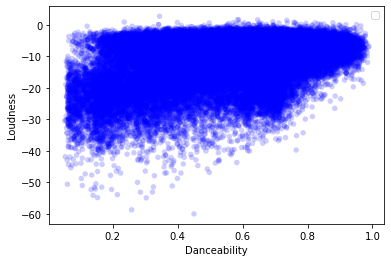

PCC =   0.3341495078854282


<Figure size 576x432 with 0 Axes>

In [63]:
# your code

dandf = tracks_df[tracks_df.danceability != 0].reset_index()
tp.Scatter(dandf['danceability'], dandf['loudness'])
tp.Show(xlabel = 'Danceability', ylabel = 'Loudness')
print("PCC =  ", ts.Corr(dandf['danceability'], dandf['loudness']))

**Q4.4** From the above plots, what can you infer? Which feature of a track has the most influence on its danceability?

**Answer:** I have no idea but I think it is the loudness because it looks like loudness because it looks like we should keep it in the range of 0 to -10